<a href="https://colab.research.google.com/github/Kartikratos/Kartikratos/blob/main/Analysing_my_first_1000_valorant_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of my first 1000 Valorant Games
Note: this data i used from Kaggle here -[Click Here!](https://www.kaggle.com/datasets/mitchellharrison/my-first-1000-valorant-games?utm_medium=social&utm_campaign=kaggle-dataset) and I tweaked it a little bit

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')


# Data Overview
### Numfrag

**top frag = highest kills (num_frag = 1); bottom frag = lowest kills (num_frag = 5)**
Lower values are better

### ACS Average Combat Score
the Average combat score (ACS) is simply the average combat score of each round. ACS is calculated per player.

### Average Damage
Avrage of damage dealt of all the rounds

### Average Damage Delta
Damage Delta is the difference between damage dealt and damage received. Average damage delta is the average of all the rounds



In [ ]:
df_start = pd.read_csv('/content/valorant_games_project.csv')

In [ ]:
df_start.head()

,game_id,episode,act,rank,date,agent,map,outcome,round_wins,round_losses,kills,deaths,assists,kdr,avg_dmg_delta,headshot_pct,avg_dmg,acs,num_frag
0,1,6,2,Unranked,4/11/2023,Chamber,Ascent,Loss,5,13,8,15,4,0.5,-61,3,76,125,3
1,2,6,2,Unranked,4/12/2023,Cypher,Icebox,Loss,4,13,3,15,2,0.2,-124,22,42,59,5
2,3,6,2,Unranked,4/15/2023,Chamber,Lotus,Win,13,4,7,12,7,0.6,-46,2,87,132,5
3,4,6,2,Unranked,4/15/2023,Chamber,Ascent,Loss,9,13,18,12,10,1.5,23,14,137,230,2
4,5,6,2,Unranked,4/15/2023,Cypher,Haven,Loss,1,13,6,14,3,0.4,-75,7,90,146,4


# Data Preparation

Average damage delta is not useful for our analysis and it is approximately depictant by the kills and deaths data and ACS.

So now I'm droping the avg_dmg_delta column

In [ ]:
df_start.columns

Index(['game_id', 'episode', 'act', 'rank', 'date', 'agent', 'map', 'outcome',
       'round_wins', 'round_losses', 'kills', 'deaths', 'assists', 'kdr',
       'avg_dmg_delta', 'headshot_pct', 'avg_dmg', 'acs', 'num_frag'],
      dtype='object')

In [ ]:
df_start = df_start.drop(['avg_dmg_delta'],axis=1).copy()

Were making a copy of the database using ".copy()"

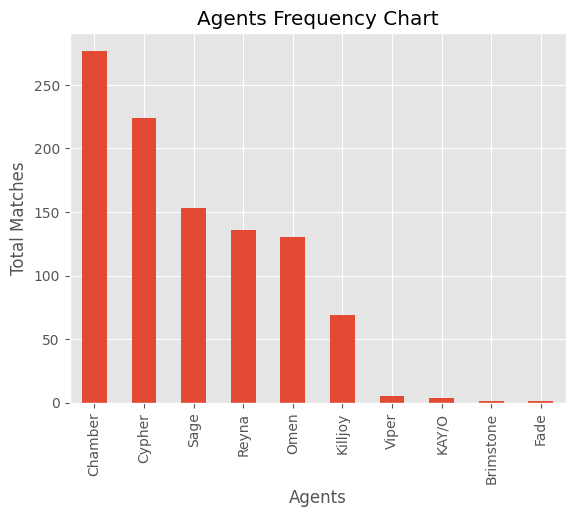

In [ ]:
ax= df_start['agent'].value_counts() \
.plot(kind = 'bar', title ='Agents Frequency Chart')
ax.set_xlabel('Agents')
ax.set_ylabel('Total Matches')
plt.show()

total matches played by Viper, KAYO, Brimstone, Fade is very less so considering them outliers

In [ ]:
# Step 1: Count total games played per agent
games_per_agent = df_start.groupby('agent')['game_id'].count()

In [ ]:
threshold = 10  # Example: Minimum 10 games
outlier_agents = games_per_agent[games_per_agent < threshold].index

In [ ]:
# Step 3: Remove rows for outlier agents
df = df_start[~df_start['agent'].isin(outlier_agents)]

In [ ]:
# Step 4: Verify results
print("Removed agents:", outlier_agents.tolist())
print("Remaining agents:", df['agent'].unique())


Removed agents: ['Brimstone', 'Fade', 'KAY/O', 'Viper']
Remaining agents: ['Chamber' 'Cypher' 'Reyna' 'Omen' 'Sage' 'Killjoy']


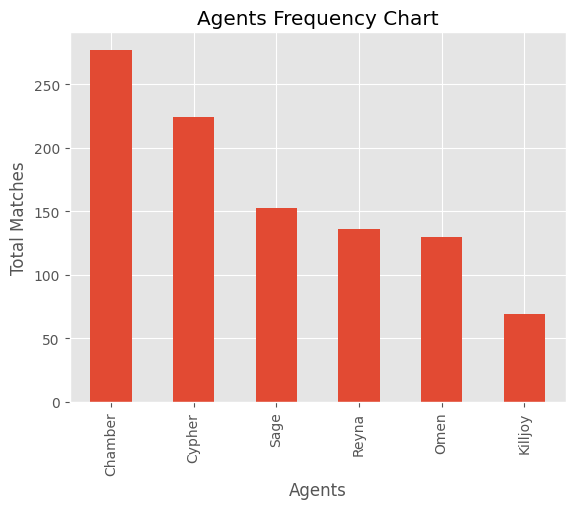

In [ ]:
ax= df['agent'].value_counts() \
.plot(kind = 'bar', title ='Agents Frequency Chart')
ax.set_xlabel('Agents')
ax.set_ylabel('Total Matches')
plt.show()

In [ ]:
df.head()

,game_id,episode,act,rank,date,agent,map,outcome,round_wins,round_losses,kills,deaths,assists,kdr,headshot_pct,avg_dmg,acs,num_frag
0,1,6,2,Unranked,4/11/2023,Chamber,Ascent,Loss,5,13,8,15,4,0.5,3,76,125,3
1,2,6,2,Unranked,4/12/2023,Cypher,Icebox,Loss,4,13,3,15,2,0.2,22,42,59,5
2,3,6,2,Unranked,4/15/2023,Chamber,Lotus,Win,13,4,7,12,7,0.6,2,87,132,5
3,4,6,2,Unranked,4/15/2023,Chamber,Ascent,Loss,9,13,18,12,10,1.5,14,137,230,2
4,5,6,2,Unranked,4/15/2023,Cypher,Haven,Loss,1,13,6,14,3,0.4,7,90,146,4


In [ ]:
df.isna().sum()

,0
game_id,0
episode,0
act,0
rank,0
date,0
agent,0
map,0
outcome,0
round_wins,0
round_losses,0


data soesn't have any missing values


In [ ]:
df.loc[df.duplicated()]

,game_id,episode,act,rank,date,agent,map,outcome,round_wins,round_losses,kills,deaths,assists,kdr,headshot_pct,avg_dmg,acs,num_frag


no duplicates in columns

In [ ]:
df.dtypes

,0
game_id,int64
episode,int64
act,int64
rank,object
date,object
agent,object
map,object
outcome,object
round_wins,int64
round_losses,int64


In [ ]:
df['date'] = pd.to_datetime(df['date'])

<ipython-input-17-e8d2d516eb0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [ ]:
df.dtypes

,0
game_id,int64
episode,int64
act,int64
rank,object
date,datetime64[ns]
agent,object
map,object
outcome,object
round_wins,int64
round_losses,int64


# feature understand

In [ ]:
df['rank'].value_counts()

,count
rank,
Diamond,357
Ascendant,229
Platinum,224
Gold,134
Unranked,25
Silver,20


this tells the total matches played in each ranks; with Lowest being Silver least time spent in this league

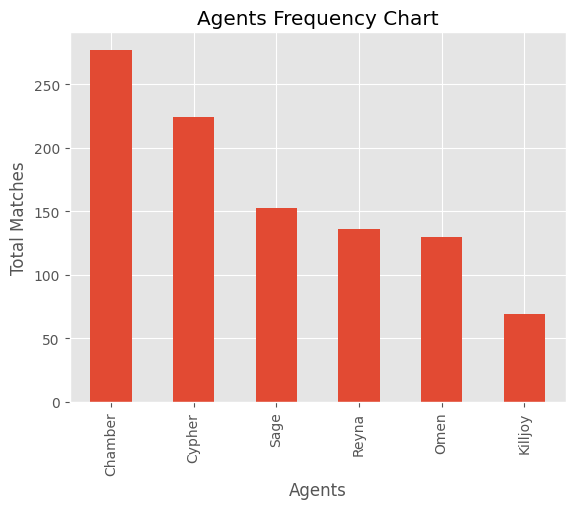

In [ ]:
ax= df['agent'].value_counts() \
.plot(kind = 'bar', title ='Agents Frequency Chart')
ax.set_xlabel('Agents')
ax.set_ylabel('Total Matches')
plt.show()

this tells us the total matches played by each agent, judging from the bar graph the player plays heavily sentinels

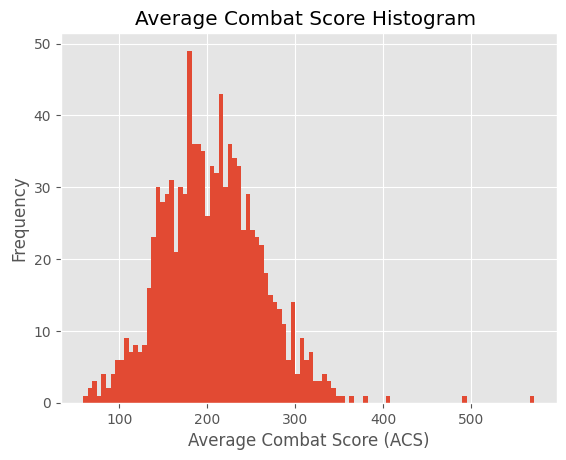

In [ ]:
bx= df['acs'].plot(kind = 'hist', bins=100, title='Average Combat Score Histogram ')
bx.set_xlabel('Average Combat Score (ACS)')
bx.set_ylabel('Frequency')
plt.show()

normal bell with peak near 190-200

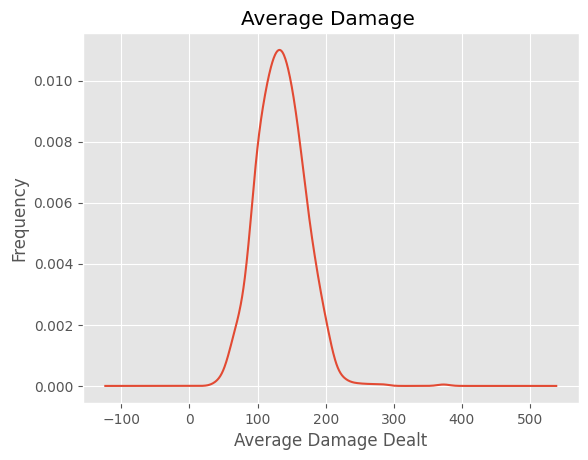

In [ ]:
bx= df['avg_dmg'].plot(kind = 'kde',  title='Average Damage ')
bx.set_xlabel('Average Damage Dealt')
bx.set_ylabel('Frequency')
plt.show()

Average damage dealt is peak aroung 120; most of the matches the player is giving 120 damage per round.
probably 1 kill or 1 assist each round with this average damage dealt

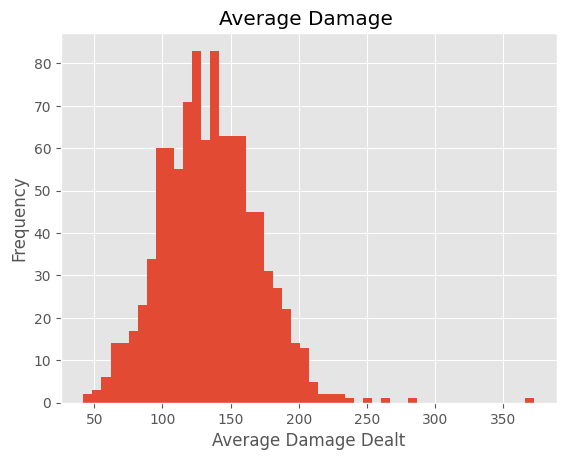

In [ ]:
bx= df['avg_dmg'].plot(kind = 'hist',bins=50,  title='Average Damage ')
bx.set_xlabel('Average Damage Dealt')
bx.set_ylabel('Frequency')
plt.show()

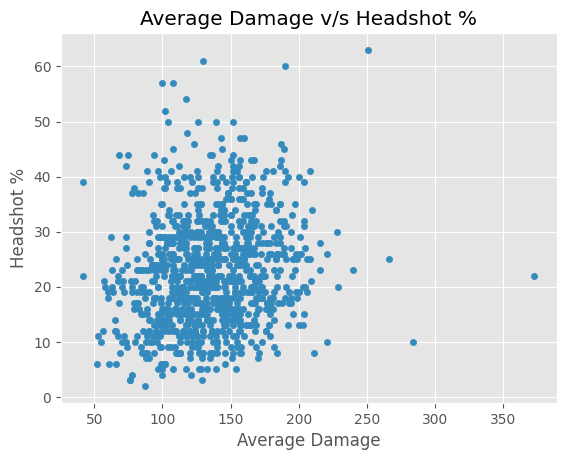

In [ ]:
cx= df.plot(kind='scatter',
       x='avg_dmg',
       y='headshot_pct', title='Average Damage v/s Headshot %')
cx.set_xlabel('Average Damage'),
cx.set_ylabel('Headshot %')

plt.show()

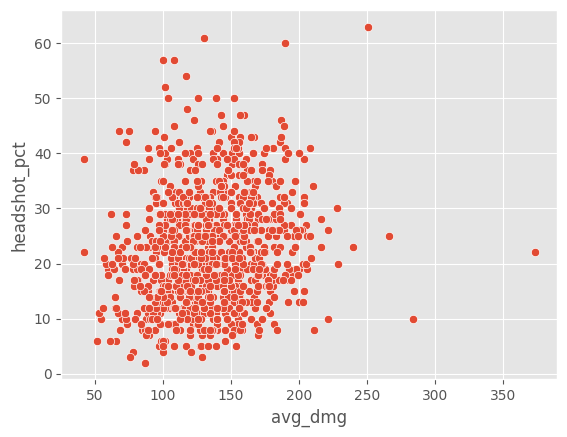

In [ ]:
sns.scatterplot(   x='avg_dmg',
                y='headshot_pct',
                data = df)
plt.show()

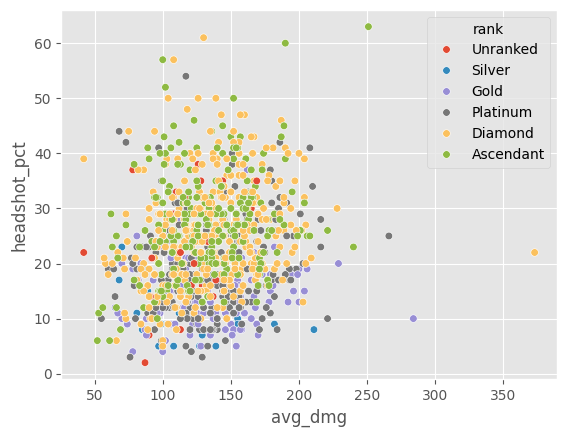

In [ ]:
sns.scatterplot(   x='avg_dmg',
                y='headshot_pct',
                hue='rank' ,
                data = df, s=30)
plt.show()

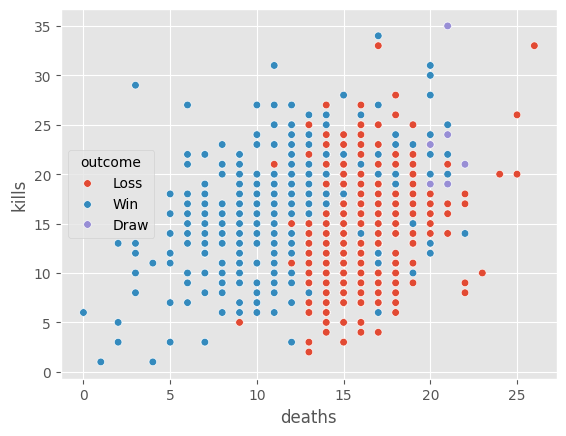

In [ ]:
sns.scatterplot(   x='deaths',
                y='kills',
                hue='outcome' ,
                data = df, s=30)
plt.show()

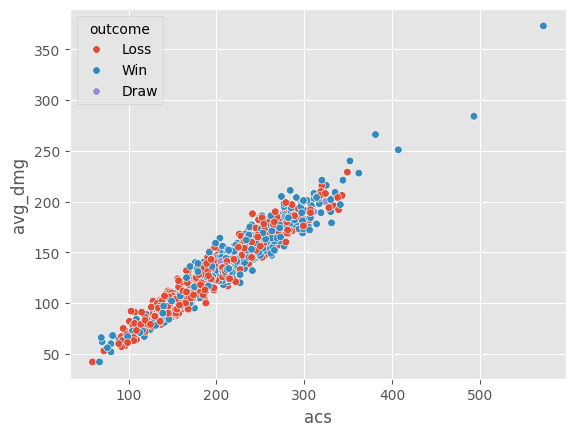

In [ ]:
sns.scatterplot(   x='acs',
                y='avg_dmg',
                hue='outcome' ,
                data = df, s=30)
plt.show()

this shows the linear dependency of average damage on ACS calculation in valorant

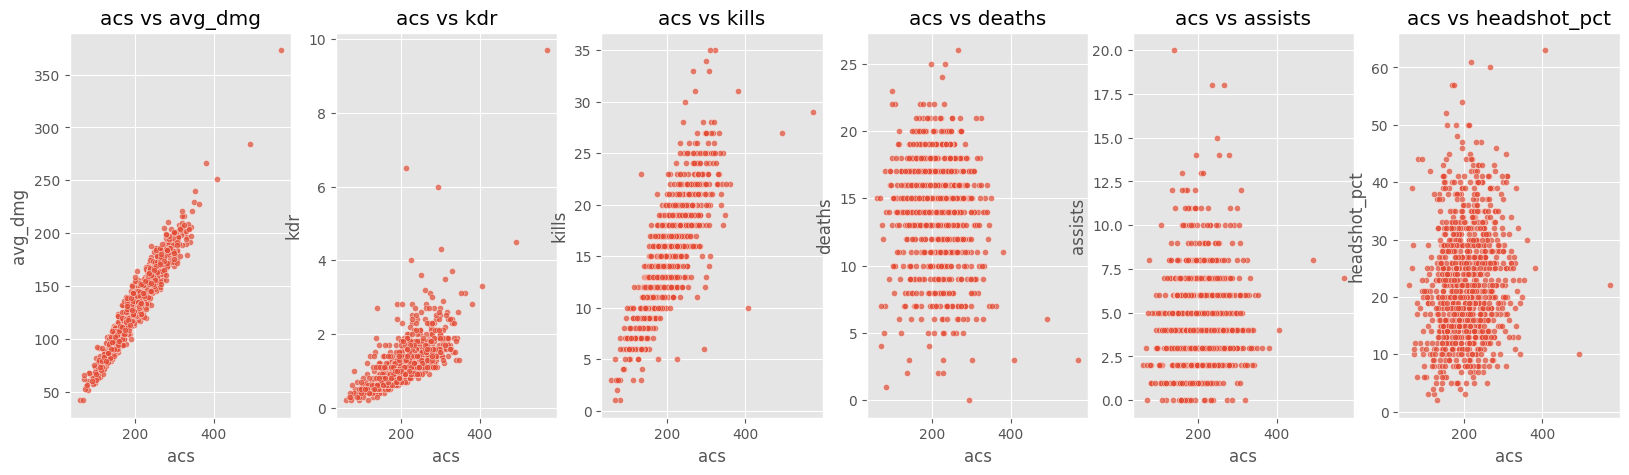

In [ ]:
x_axis = "acs"
y_axes = ["avg_dmg","kdr","kills", "deaths", "assists", "headshot_pct" ]

# Set up the subplots
fig, axes = plt.subplots(1, len(y_axes),figsize=(20, 5), sharex=True, sharey=False)

# Create scatter plots for each pair
for i, y_axis in enumerate(y_axes):
    sns.scatterplot(data=df, x=x_axis, y=y_axis, ax=axes[i], alpha=0.7, s=20)
    axes[i].set_title(f"{x_axis} vs {y_axis}")
    axes[i].set_xlabel(x_axis)
    axes[i].set_ylabel(y_axis)

# Adjust layout for clarity
#plt.tight_layout()
plt.show()

this shows the dependancies and how Average combat score is calculated in valorant
Linearly dependent on Average Damage
Linearly dependent on Kills (plot distorted due to repitive kills)
Linearly dependent on KDR (Kills / Deaths Ration)

these three data points are practically the same, but Average damage gives a better estimate of acs which means not only kills but assists in game affects your acs.

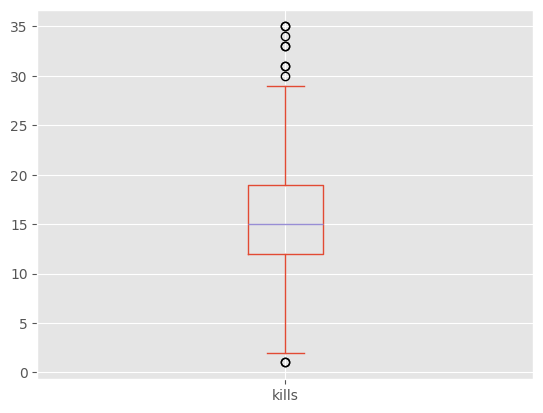

In [ ]:
df['kills'].plot(kind='box');

<ipython-input-31-c8c317d44ac5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='map', y='acs', data=df,palette="vlag")


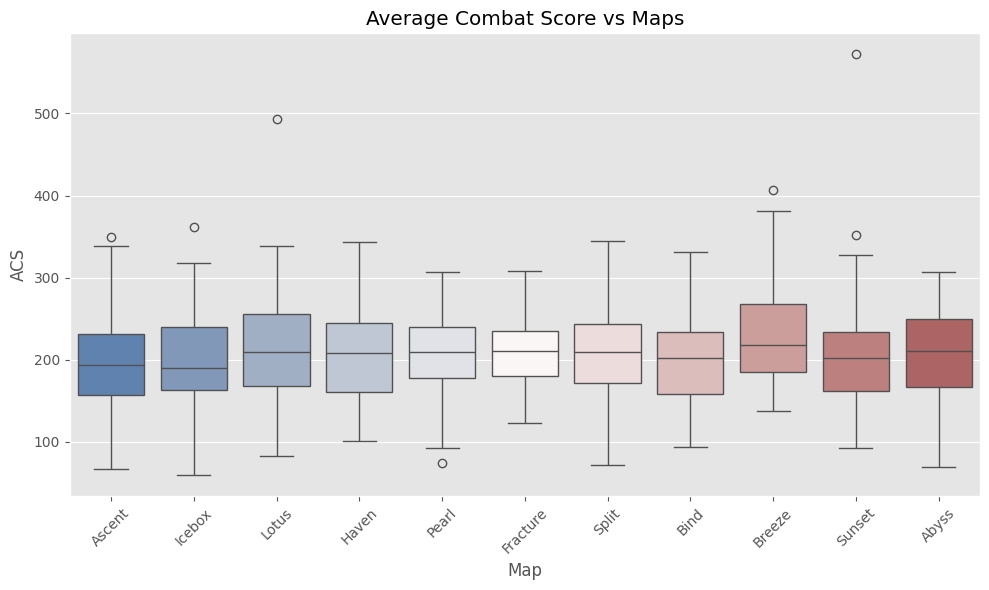

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='map', y='acs', data=df,palette="vlag")

plt.title('Average Combat Score vs Maps')
plt.xlabel('Map')
plt.ylabel('ACS')
plt.xticks(rotation=45)  # Rotate map names if needed
plt.tight_layout()
plt.show()

### i dont even know what to infer from this plot, i was just trying different plots and found this boxplot interesting

just learnt it here - [https://youtu.be/nV8jR8M8C74?si=iYWdfyAEzGEu8xN9](http://)



<ipython-input-32-bfa5d0627060>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


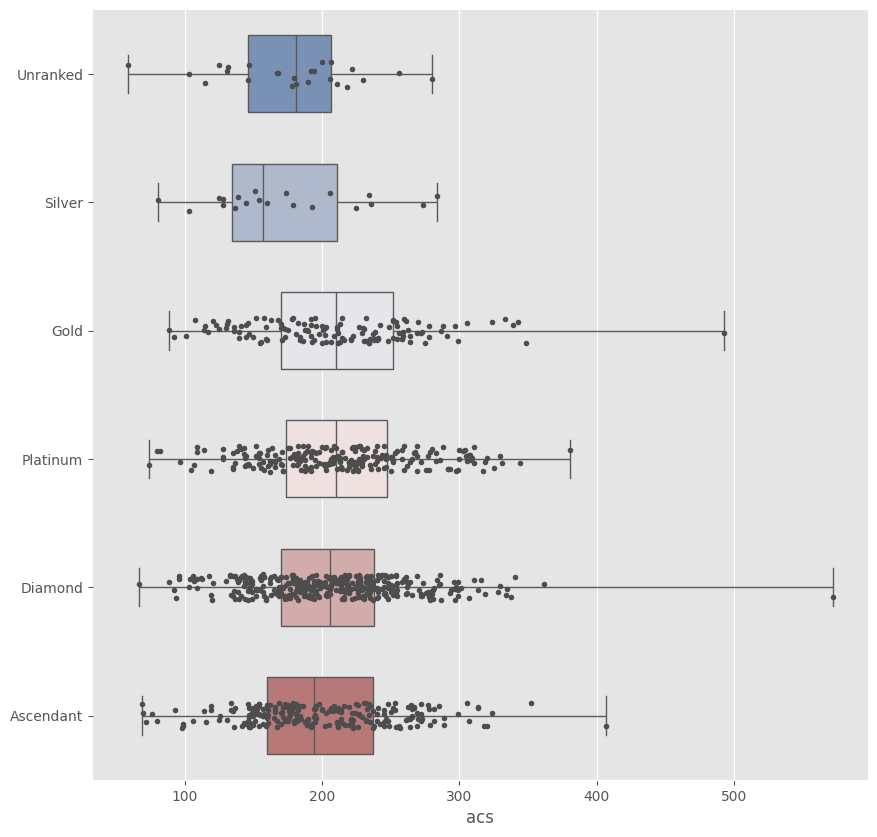

In [ ]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 10))
# ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(
    data=df,
    x="acs",
    y="rank",
    whis=[0, 100],
    width=.6,
    palette="vlag"
)

# Add in points to show each observation- this is used to plot the points in the same graph
sns.stripplot(
     data=df,
     x="acs",
     y="rank",
     size=4,
     color=".3"
 )

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

plt.show()

### silver being the median lowest among other ranks


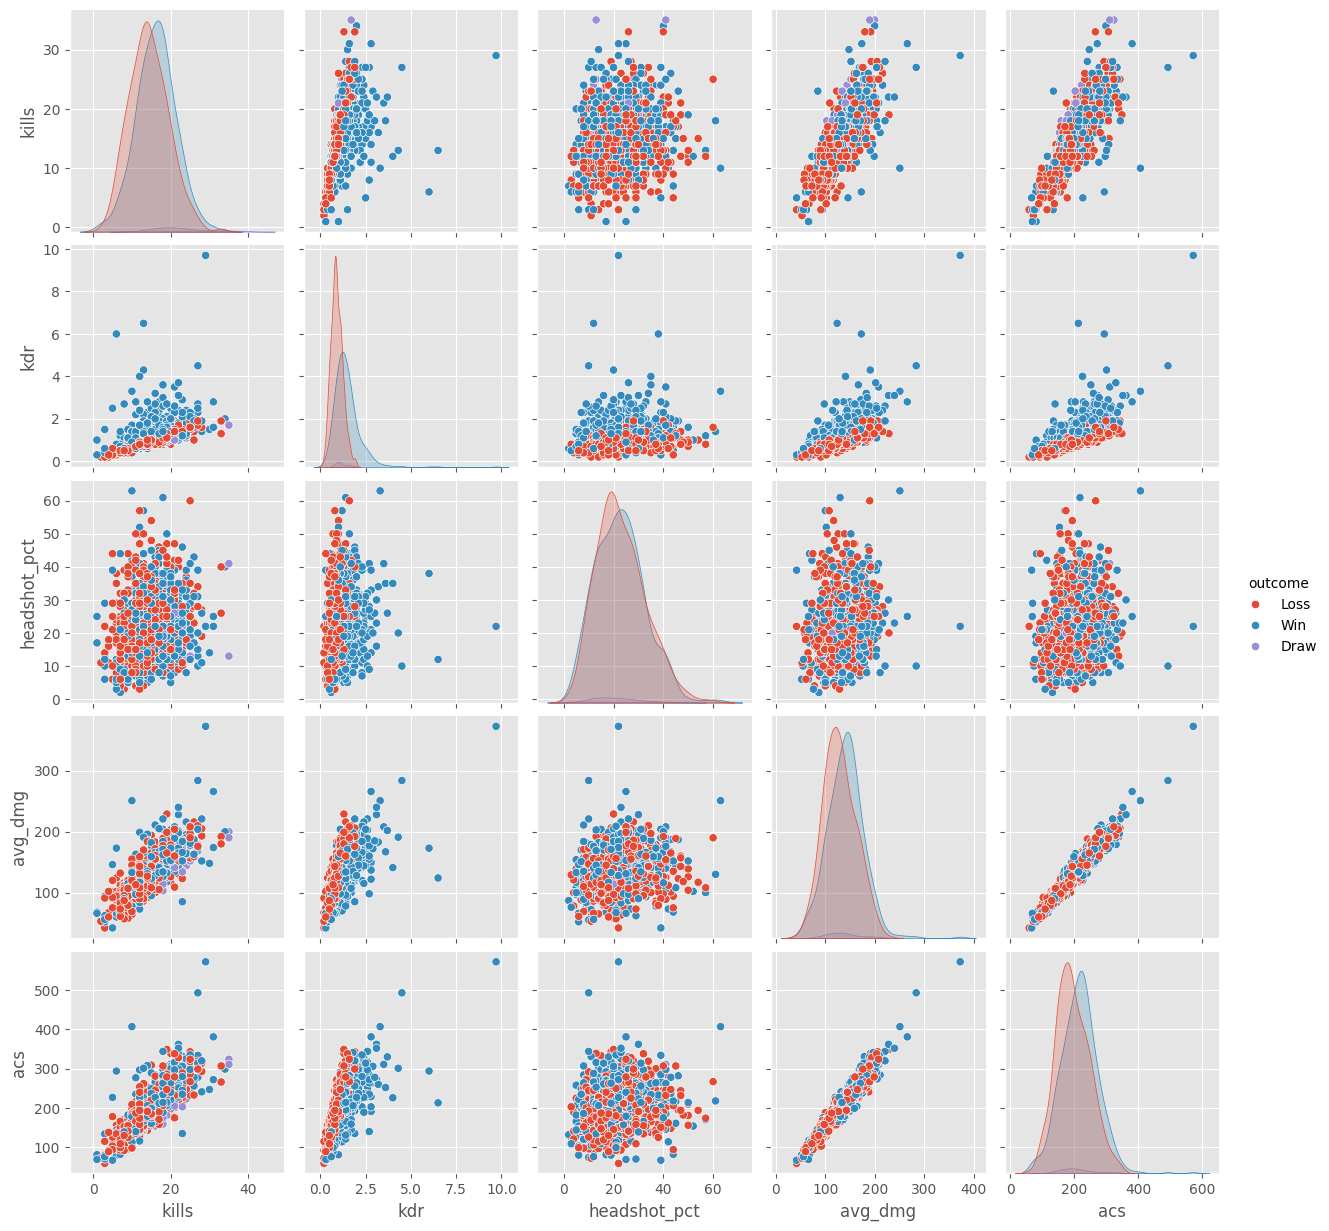

In [ ]:
sns.pairplot(df, vars=['kills','kdr',
       'headshot_pct', 'avg_dmg', 'acs'], hue ='outcome')
plt.show()

In [ ]:
df_corr = df[['kills','kdr',
       'headshot_pct', 'avg_dmg', 'acs']].corr()

<Axes: >

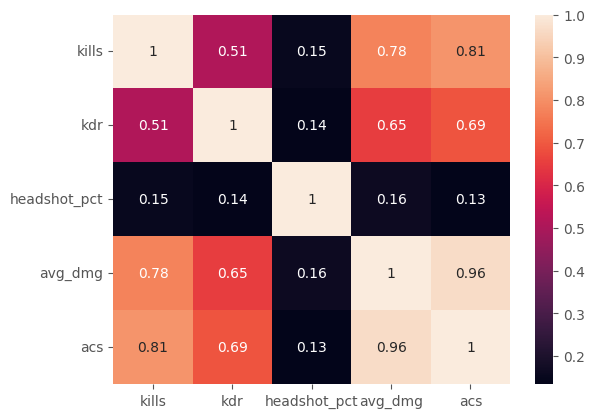

In [ ]:
sns.heatmap(df_corr, annot=True )

# Asking Questions


1.   Specific Agent with high or low kills?
2.   Specific Agent with high or low winrate?
3.   Best performance in which episodes/acts?
4.   Best performing agents in each episodes?
5.   Best performing agents in each map?
6.   Rank progression over time
7.   Advanced- Can you predict the outcome of the match if you have the other data? what parameters would you consider and on what basis?
8. How does your performance vary depending on match pacing (e.g., fast wins like 13-3 vs. long matches like 16-14)?
9. Identify if you play more as a support (assist-heavy) or carry (kill-heavy).
10. In games with the highest win margins (e.g., 13-1), what factors contributed most? (e.g., agent selection, map familiarity.)
Insight: Highlight the recipe for your most dominant victories.







# Question 1 - Specific Agent with highest kills and lowest kills
# Answer- I am assuming this question as highest average kills of all matches of a particular agent and vice-versa.


<ipython-input-36-76966d0377d5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


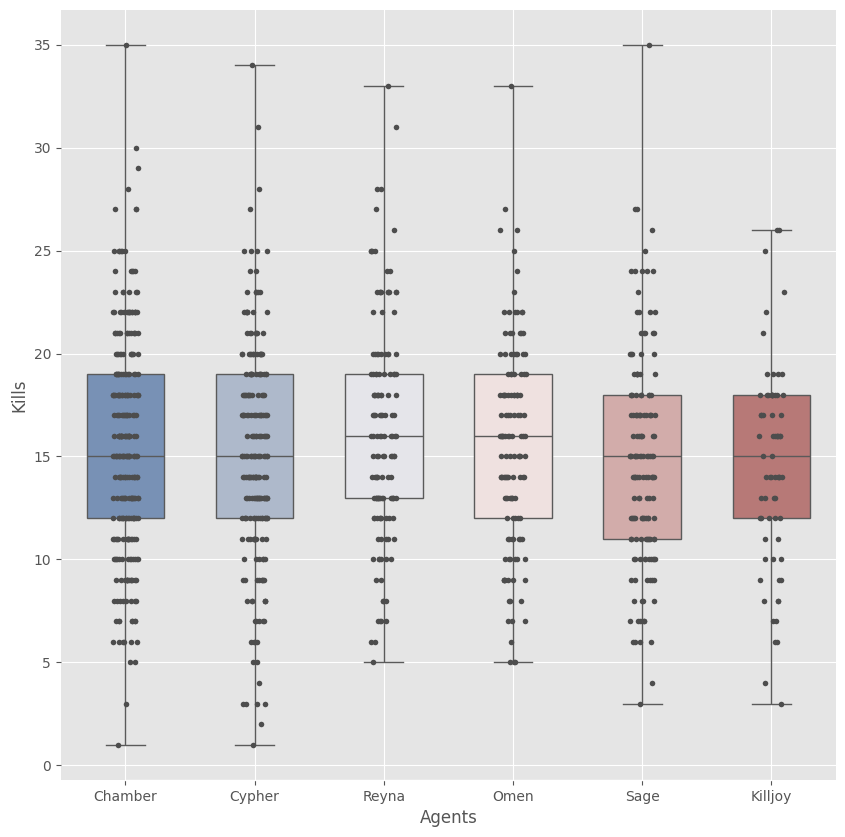

In [ ]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 10))
# ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(
    data=df,
    x="agent",
    y="kills",
    whis=[0, 100],
    width=.6,
    palette="vlag"
)

# Add in points to show each observation- this is used to plot the points in the same graph
sns.stripplot(
     data=df,
     x="agent",
     y="kills",
     size=4,
     color=".3"
 )

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Kills")
ax.set(xlabel="Agents")
sns.despine(trim=True, left=True)

plt.show()

# According to this box-plot along with strip-plot we can infer that the median of kills by Reyna and Omen is higher than than the rest,
1. Min(Reyna)    = Min(Omen)
2. Q1(Reyna)     > Q1(Omen)
3. Median(Reyna) = Median(Omen)
4. Q2(Reyna)     = Q2(Omen)
5. Max(Reyna)    = Min(Omen)

We can say that the highest kills per agent the median lies in the favour of Reyna and Omen.

# if we don't consider the matches played bu KAYO, Viper ,Brimstone , Fade as the no of matches played by these agents are relatively very small; Lowest Kills goes to Killjoy using the same analysis as above.


Problems in my Approach
1. The question is about the agent with the highest kills and lowest kills, but you’ve shifted the focus to analyzing medians. It’s better to compute the actual mean/average kills for each agent to rank them.

2. Ignoring Small Sample Sizes-Excluding agents with fewer matches (e.g., KAY/O, Viper, etc.) without statistical justification could introduce bias. Instead, provide the counts of matches for each agent and decide on a threshold (e.g., exclude agents with fewer than 5 matches).

3. Instead of relying entirely on visual interpretation, calculate the mean, median, and the count of kills for each agent using pandas for a more data-driven conclusion.

In [ ]:
# Summary statistics
df.groupby("agent")["kills"].agg(["mean", "median", "min", "max", "count"]).sort_values("mean", ascending=False)



,mean,median,min,max,count
agent,,,,,
Reyna,16.242647,16.0,5,33,136
Chamber,15.537906,15.0,1,35,277
Omen,15.500000,16.0,5,33,130
Cypher,15.040179,15.0,1,34,224
Sage,14.758170,15.0,3,35,153
Killjoy,14.521739,15.0,3,26,69


did you see the mistake in my previous approach, i misunderstood the visual representation and called omen with more kills than chamber but in reality the mean(chamber)>mean(omen).

1. Highest Kills agent is Reyna
2. Lowest Kills agent is Brimstone and Fade

#Question 2- Specific Agent with high or low winrate?
#Answer- I'll be using the same approach as previour question, summary statistics including no of wins with respect to different agents,
# my approach- first we'll calculate total no of wins per agent and total no of matches per agent and then the ratio of Wins/Total we'll be comparing different agents.

In [ ]:
df.groupby("agent")['outcome'].value_counts()

agent    outcome
Chamber  Win        139
         Loss       133
         Draw         5
Cypher   Loss       115
         Win        106
         Draw         3
Killjoy  Loss        38
         Win         31
Omen     Loss        65
         Win         65
Reyna    Win         73
         Loss        63
Sage     Loss        78
         Win         71
         Draw         4
Name: count, dtype: int64

In [ ]:
df.groupby("agent")['outcome'].count()

,outcome
agent,
Chamber,277
Cypher,224
Killjoy,69
Omen,130
Reyna,136
Sage,153


In [ ]:
grouped_data = df.groupby('agent')['outcome'].value_counts().unstack(fill_value=0)
grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data['Win Ratio'] = grouped_data['Win'] / grouped_data['Total']
grouped_data['Win %'] = grouped_data['Win Ratio'] * 100
grouped_data['Loss %'] = ( grouped_data['Loss']*100)/grouped_data['Total']
grouped_data.sort_values('Win Ratio', ascending=False)

outcome,Draw,Loss,Win,Total,Win Ratio,Win %,Loss %
agent,,,,,,,
Reyna,0,63,73,136,0.536765,53.676471,46.323529
Chamber,5,133,139,277,0.501805,50.180505,48.014440
Omen,0,65,65,130,0.500000,50.000000,50.000000
Cypher,3,115,106,224,0.473214,47.321429,51.339286
Sage,4,78,71,153,0.464052,46.405229,50.980392
Killjoy,0,38,31,69,0.449275,44.927536,55.072464


Unstack's fill_value Parameter: Filling the Gaps

In Pandas, the unstack() method is used to reshape a hierarchical DataFrame by moving one level of the hierarchical index to the columns. However, sometimes, unstacking can lead to missing values (NaNs) in the resulting DataFrame.

This is where the fill_value parameter comes into play. It allows you to specify a value to replace these missing values with. By providing a fill_value, you can ensure that your unstacked DataFrame has no missing data and is ready for further analysis or visualization.

after that we altereated the 'grouped_data' by adding Total, win ration, Win%


##Now we can clearly see that, the
## 1. Brimstone highest
## 2. Kayo lowest winrate
## 3. Reyna highest and Killjoy lowest (if we consider Brimstone, Fade, Viper, Kayo as outliers) #

# Question 3- Best performance in which episodes/acts?
# Answer- We'll be doing the Winrat% every episodes and comparing , sort of similar question to the above one

In [ ]:
grouped_data1 = df.groupby('episode')['outcome'].value_counts().unstack(fill_value=0)
grouped_data1['Total'] = grouped_data1.sum(axis=1)
grouped_data1['Win Ratio'] = grouped_data1['Win'] / grouped_data1['Total']
grouped_data1['Win %'] = grouped_data1['Win Ratio'] * 100
grouped_data1['Loss %'] = ( grouped_data1['Loss']*100)/grouped_data1['Total']
grouped_data1.sort_values('Win Ratio', ascending=False)

outcome,Draw,Loss,Win,Total,Win Ratio,Win %,Loss %
episode,,,,,,,
8,2,94,107,203,0.527094,52.709360,46.305419
6,4,102,113,219,0.515982,51.598174,46.575342
7,2,157,151,310,0.487097,48.709677,50.645161
9,4,139,114,257,0.443580,44.357977,54.085603


#Question 4- Best performing agents in each episodes?

In [ ]:
grouped_data1 = df.groupby(['episode','agent'])['outcome'].value_counts().unstack(fill_value=0)
grouped_data1['Total'] = grouped_data1.sum(axis=1)
grouped_data1['Win Ratio'] = grouped_data1['Win'] / grouped_data1['Total']
grouped_data1['Win %'] = grouped_data1['Win Ratio'] * 100
grouped_data1['Loss %'] = ( grouped_data1['Loss']*100)/grouped_data1['Total']
grouped_data1.sort_values(['episode','Win %'], ascending=False)

outcome          Draw  Loss  Win  Total  Win Ratio      Win %      Loss %
episode agent                                                            
9       Reyna       0    17   21     38   0.552632  55.263158   44.736842
        Killjoy     0    11   13     24   0.541667  54.166667   45.833333
        Chamber     2    31   33     66   0.500000  50.000000   46.969697
        Omen        0    21   19     40   0.475000  47.500000   52.500000
        Cypher      0    30   16     46   0.347826  34.782609   65.217391
        Sage        2    29   12     43   0.279070  27.906977   67.441860
8       Reyna       0     8   16     24   0.666667  66.666667   33.333333
        Omen        0     9   13     22   0.590909  59.090909   40.909091
        Sage        0    16   18     34   0.529412  52.941176   47.058824
        Chamber     1    29   30     60   0.500000  50.000000   48.333333
        Cypher      1    31   30     62   0.483871  48.387097   50.000000
        Killjoy     0     1    0      1   0.000000   0.000000  100.000000
7       Sage        1    18   26     45   0.577778  57.777778   40.000000
        Cypher      1    22   30     53   0.566038  56.603774   41.509434
        Chamber     0    43   42     85   0.494118  49.411765   50.588235
        Reyna       0    23   18     41   0.439024  43.902439   56.097561
        Killjoy     0    25   18     43   0.418605  41.860465   58.139535
        Omen        0    26   17     43   0.395349  39.534884   60.465116
6       Omen        0     9   16     25   0.640000  64.000000   36.000000
        Reyna       0    15   18     33   0.545455  54.545455   45.454545
        Chamber     2    30   34     66   0.515152  51.515152   45.454545
        Sage        1    15   15     31   0.483871  48.387097   48.387097
        Cypher      1    32   30     63   0.476190  47.619048   50.793651
        Killjoy     0     1    0      1   0.000000   0.000000  100.000000

# Question 5- Best performing agents in each map?


In [ ]:
grouped_data2 = df.groupby(['map','agent'])['outcome'].value_counts().unstack(fill_value=0)
grouped_data2['Total'] = grouped_data2.sum(axis=1)
grouped_data2['Win Ratio'] = grouped_data2['Win'] / grouped_data2['Total']
grouped_data2['Win %'] = grouped_data2['Win Ratio'] * 100
grouped_data2['Loss %'] = ( grouped_data2['Loss']*100)/grouped_data2['Total']
grouped_data2 = grouped_data2.sort_values(['map','Win %'], ascending=False)

top_3_agents = grouped_data2.groupby('map').head(2)

# Print the top 3 agents for each map
print(top_3_agents)

outcome           Draw  Loss  Win  Total  Win Ratio       Win %     Loss %
map      agent                                                            
Sunset   Chamber     1     8   14     23   0.608696   60.869565  34.782609
         Sage        0     4    6     10   0.600000   60.000000  40.000000
Split    Killjoy     0     3    5      8   0.625000   62.500000  37.500000
         Sage        0     7    9     16   0.562500   56.250000  43.750000
Pearl    Omen        0     2    6      8   0.750000   75.000000  25.000000
         Cypher      0     4    6     10   0.600000   60.000000  40.000000
Lotus    Chamber     0    18   28     46   0.608696   60.869565  39.130435
         Reyna       0    10   12     22   0.545455   54.545455  45.454545
Icebox   Reyna       0     3    4      7   0.571429   57.142857  42.857143
         Omen        0     4    4      8   0.500000   50.000000  50.000000
Haven    Chamber     0    12   16     28   0.571429   57.142857  42.857143
         Reyna       0   

# Question 6- Rank progression over time



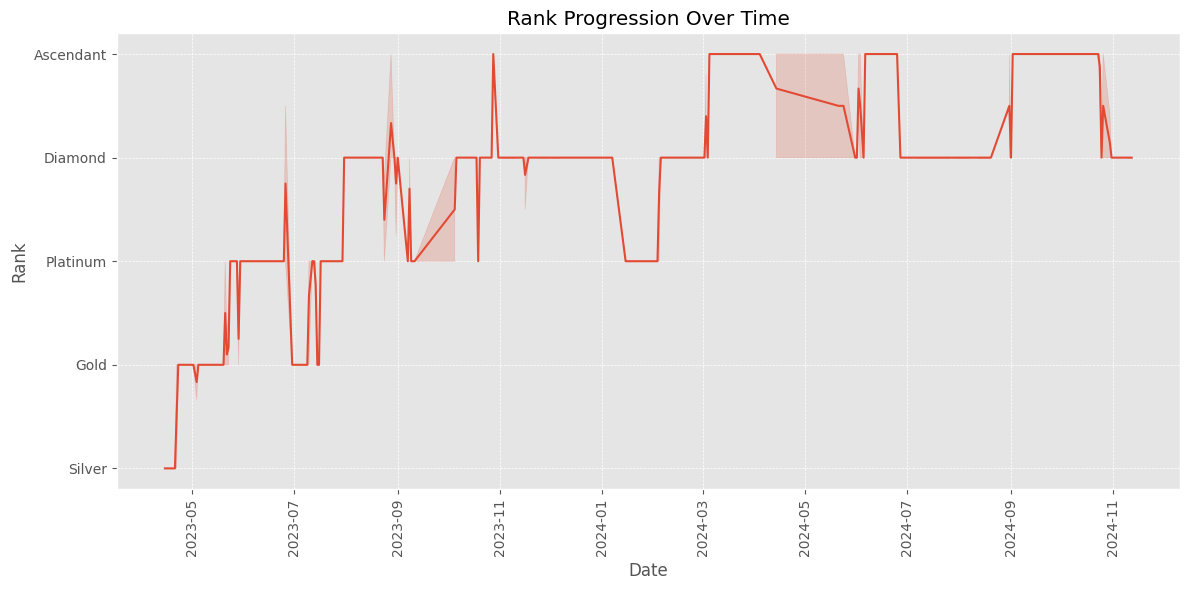

In [ ]:
plt.figure(figsize=(12, 6))
df_question = df[df['rank'] != 'Unranked']



sns.lineplot(x='date', y='rank', data = df_question )

plt.gca().invert_yaxis()

plt.title("Rank Progression Over Time")
plt.xlabel("Date")
plt.ylabel("Rank")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed

plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

in 2023 the rank plummeted from Silver --> Gold -->Platinum -->Diamond -->Ascendant from May23 to Dec23 in 7 months

in 2024 the rank fluctuated from diamond to plat in Jan24 to Feb24 and then Diamond to Ascendant in Feb24 to Dec24

# Advanced- Can you predict the outcome of the match if you have the other data? what parameters would you consider and on what basis?

# Answer- to predict the % chance of win based on the other data i have, lets first with analysing what are the different parameters contributing the win start, one thing to note that is that the valorant is an multiplayer-team based game and predicting the win based on a single persons data is irrelevant, and beyond the capabilities of our data analysis.


In [ ]:
df.head()

,game_id,episode,act,rank,date,agent,map,outcome,round_wins,round_losses,kills,deaths,assists,kdr,headshot_pct,avg_dmg,acs,num_frag
0,1,6,2,Unranked,2023-04-11,Chamber,Ascent,Loss,5,13,8,15,4,0.5,3,76,125,3
1,2,6,2,Unranked,2023-04-12,Cypher,Icebox,Loss,4,13,3,15,2,0.2,22,42,59,5
2,3,6,2,Unranked,2023-04-15,Chamber,Lotus,Win,13,4,7,12,7,0.6,2,87,132,5
3,4,6,2,Unranked,2023-04-15,Chamber,Ascent,Loss,9,13,18,12,10,1.5,14,137,230,2
4,5,6,2,Unranked,2023-04-15,Cypher,Haven,Loss,1,13,6,14,3,0.4,7,90,146,4


In [ ]:
df.columns

Index(['game_id', 'episode', 'act', 'rank', 'date', 'agent', 'map', 'outcome',
       'round_wins', 'round_losses', 'kills', 'deaths', 'assists', 'kdr',
       'headshot_pct', 'avg_dmg', 'acs', 'num_frag'],
      dtype='object')

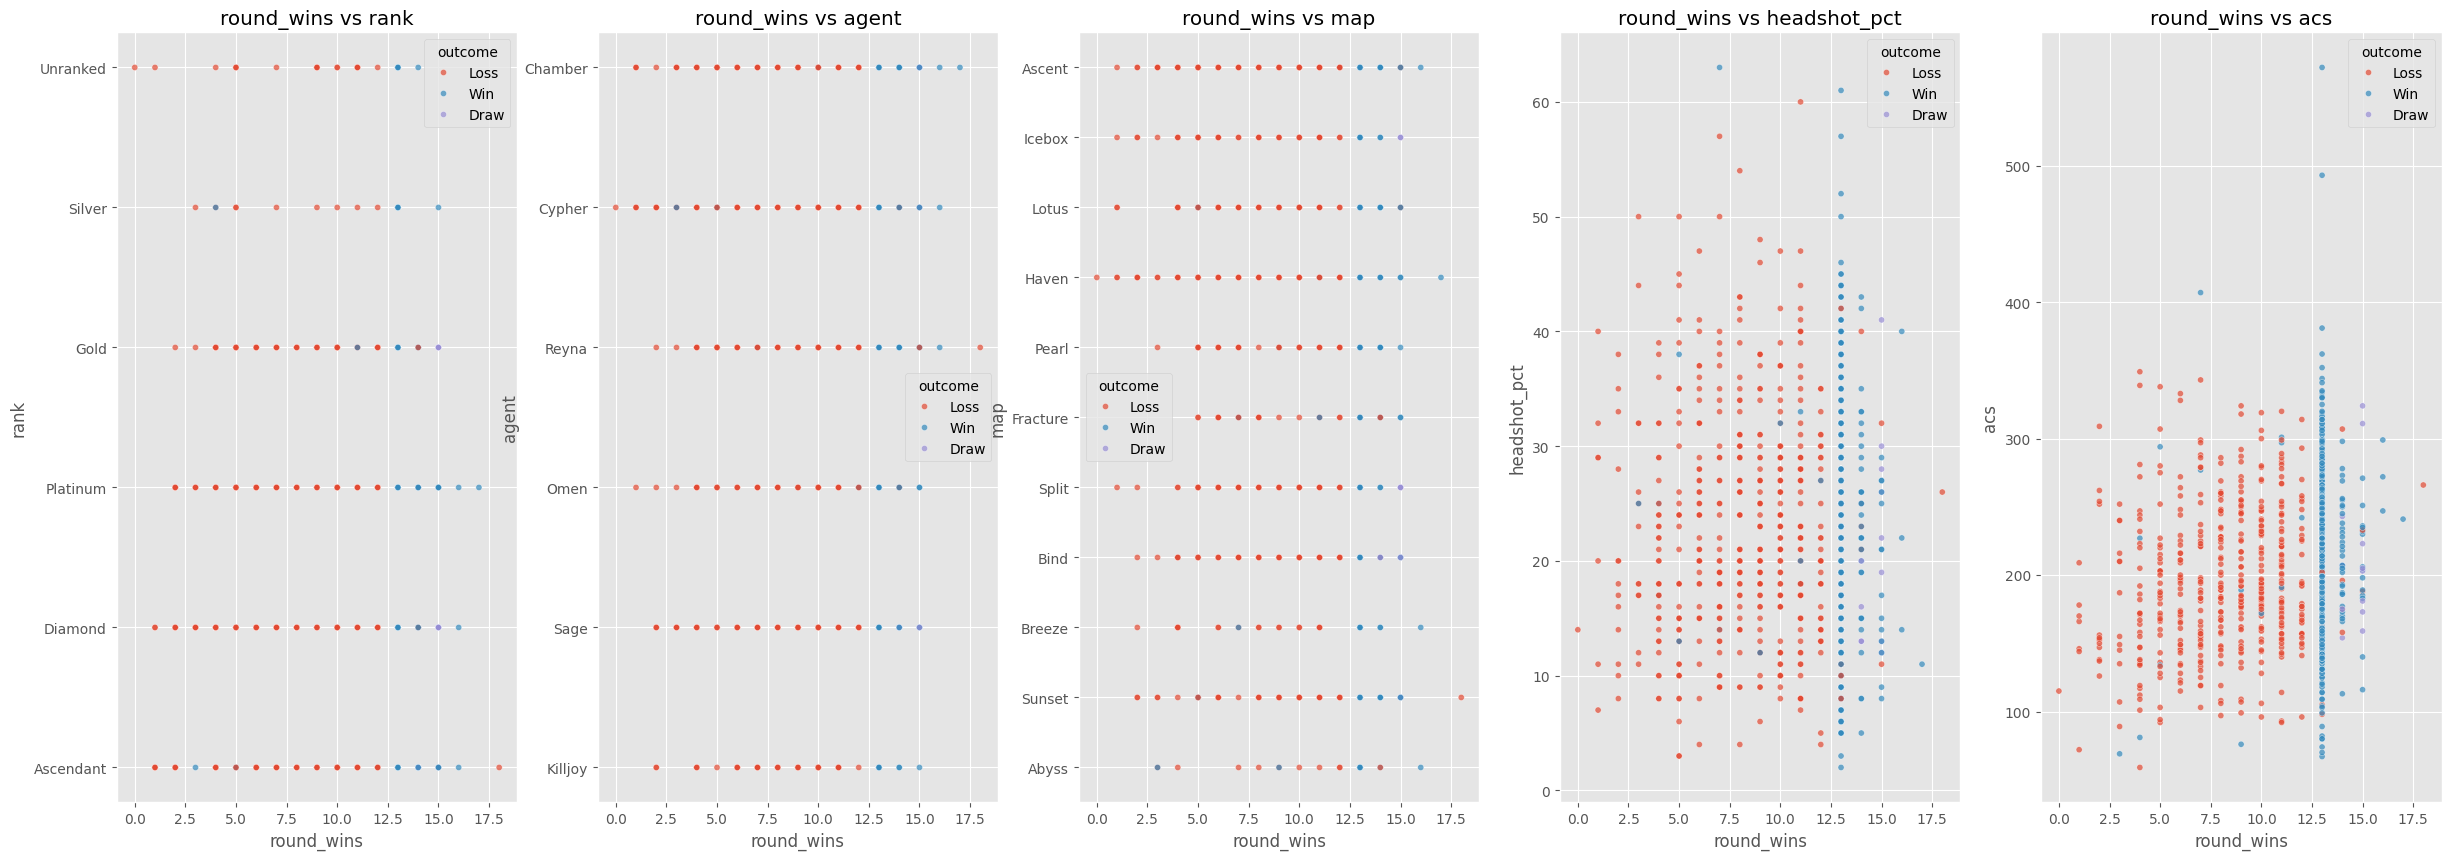

In [ ]:
x_axis = "round_wins"
y_axes = ["rank", "agent", "map",
       "headshot_pct", "acs" ]

# Set up the subplots
fig, axes = plt.subplots(1, len(y_axes),figsize=(30, 10), sharex=True, sharey=False)

# Create scatter plots for each pair
for i, y_axis in enumerate(y_axes):
    sns.scatterplot(data=df, x=x_axis, y=y_axis, hue ='outcome', ax=axes[i], alpha=0.7, s=20)
    axes[i].set_title(f"{x_axis} vs {y_axis}")
    axes[i].set_xlabel(x_axis)
    axes[i].set_ylabel(y_axis)

# Adjust layout for clarity
#plt.tight_layout()
plt.show()

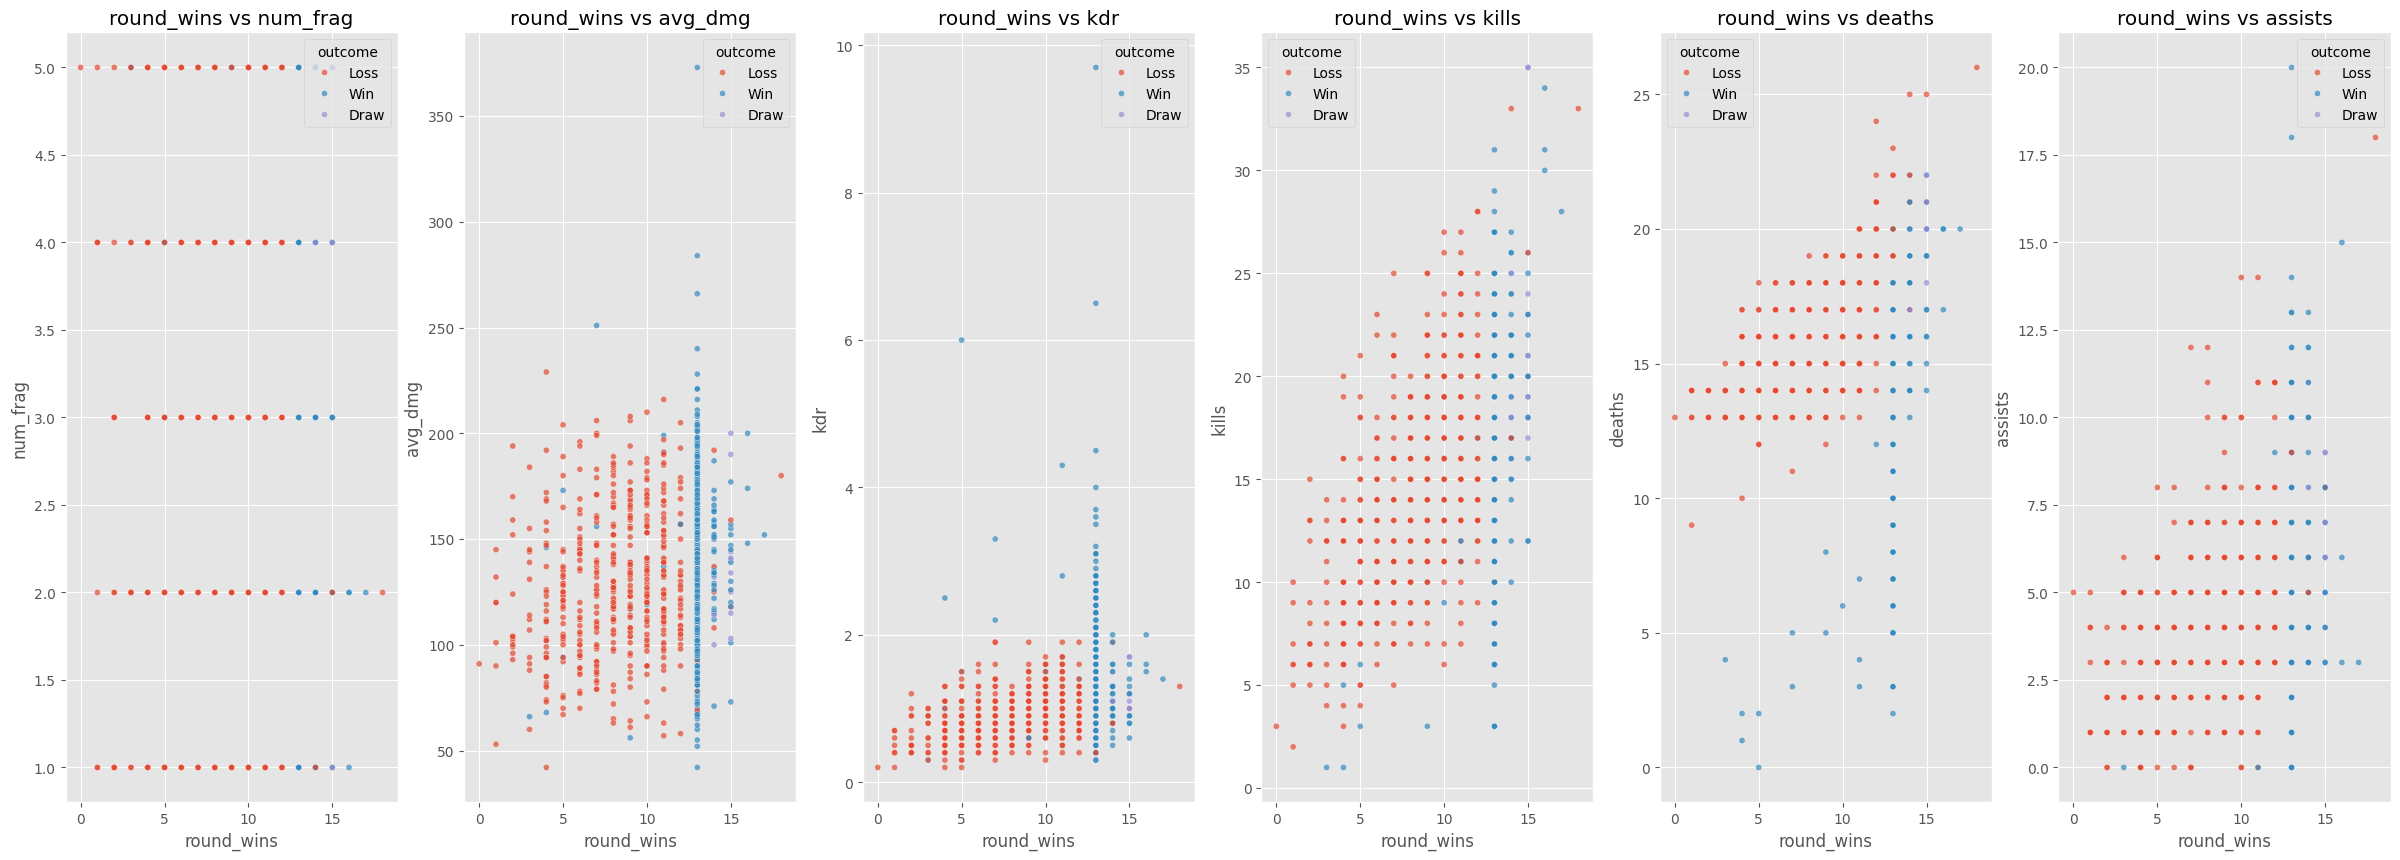

In [ ]:


 x_axis = "round_wins"
y_axes = [ "num_frag","avg_dmg","kdr","kills", "deaths", "assists"]

# Set up the subplots
fig, axes = plt.subplots(1, len(y_axes),figsize=(30, 10), sharex=True, sharey=False)

# Create scatter plots for each pair
for i, y_axis in enumerate(y_axes):
    sns.scatterplot(data=df, x=x_axis, y=y_axis, hue ='outcome', ax=axes[i], alpha=0.7, s=20)
    axes[i].set_title(f"{x_axis} vs {y_axis}")
    axes[i].set_xlabel(x_axis)
    axes[i].set_ylabel(y_axis)

# Adjust layout for clarity
#plt.tight_layout()
plt.show()